In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random

In [48]:
df= pd.read_csv("../../data/processed/norookies.csv")
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

In [49]:
df.dtypes

Unnamed: 0.1.1                int64
age                           int64
draft_pos                     int64
attempts                      int64
yards_run                     int64
tds_run                       int64
longgain_run                  int64
yardsperatt                 float64
yardspergame_run            float64
Percenthit (%)              float64
g                             int64
gs                            int64
tgt                           int64
rec                           int64
yards_rec                     int64
yardsperrec                 float64
tds_rec                       int64
firstdowns                    int64
longgain_rec                  int64
yardspertarget              float64
recpergame                  float64
yardspergame_rec            float64
fumbles                       int64
team_adjusted_line_yards    float64
team_running_back_yards     float64
team_stuffed_rate           float64
dtype: object

In [50]:
from sklearn.model_selection import train_test_split
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

Train on 237 samples, validate on 60 samples
Epoch 1/50
237/237 [==============================] - 1s 4ms/step - loss: 12.8064 - val_loss: 10.3057
Epoch 2/50
237/237 [==============================] - 0s 435us/step - loss: 12.4826 - val_loss: 10.1064
Epoch 3/50
237/237 [==============================] - 0s 384us/step - loss: 12.2741 - val_loss: 9.9428
Epoch 4/50
237/237 [==============================] - 0s 579us/step - loss: 12.1333 - val_loss: 9.8260
Epoch 5/50
237/237 [==============================] - 0s 600us/step - loss: 12.0042 - val_loss: 9.7047
Epoch 6/50
237/237 [==============================] - 0s 577us/step - loss: 11.8552 - val_loss: 9.5473
Epoch 7/50
237/237 [==============================] - 0s 682us/step - loss: 11.6484 - val_loss: 9.3137
Epoch 8/50
237/237 [==============================] - 0s 487us/step - loss: 11.3469 - val_loss: 8.9530
Epoch 9/50
237/237 [==============================] - 0s 548us/step - loss: 10.8583 - val_loss: 8.3958
Epoch 10/50
237/237 [=======

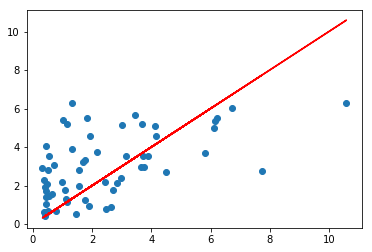

In [53]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
opt = Adam()
esv = []
# while True: 
for i in range(1):
    
    X_train.shape
    model = Sequential()

    model.add(Dense(24, activation="relu"))
    model.add(Dense(random.randint(6,9), activation="relu"))
    model.add(Dense(random.randint(6,9), activation="relu"))
    model.add(Dense(random.randint(6,9), activation="relu"))
    

    model.add(Dense(1))

    model.compile(optimizer=opt, loss="mse")
    model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=30,epochs=50)
    
    predictions = model.predict(X_test)
    esv.append(explained_variance_score(y_test,predictions))
    print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
    if(explained_variance_score(y_test,predictions) > .625):
        #winsound.Beep(1047, 750)
        #winsound.Beep(1047, 750)
        break
#     winsound.Beep(1397,250)

esv.sort(reverse=True)
print("\n")
print("MAX: " + str(max(esv)))
print("\n")
print(esv)
print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))
plt.figure()
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
#winsound.Beep(784, 750)

In [8]:
#model.save('./savedmodels/63dnn')

In [20]:
#loaded_model = tf.keras.models.load_model('./savedmodels/63dnn/')
#predictions = loaded_model.predict(X_test)
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  1.9156764059495022
RMSE:  1.3840796241363797
MAE:  0.9464164398289482
ESV:  0.49979307236373227
